In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np

from asr.bvae import bVAE, ConvEncoder, ConvDecoder
from asr.util import load_model

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

model = load_model('../models_test','bvae_dsprite_beta_4')
ldim = model.latent_dim
num_samples = 25
data = np.load('../data/test/dsprites_test.npz')
imgs = data['imgs'][100:100+num_samples]
imgs = np.expand_dims(imgs, 1)/255

loading checkpoint from ../models_test/bvae_dsprite_beta_4_state.tp
loading model...
parameterize optimizer...
loading done


In [16]:
mus, log_vars = model.encode(torch.tensor(imgs))
print(torch.mean(mus), mus)
print(torch.mean(log_vars), log_vars)

latent_representations = model.sample(mus, log_vars)
# print(latent_representations)

tensor(9.0882, dtype=torch.float64, grad_fn=<MeanBackward1>) tensor([[ -74.6382,  -70.3505,   75.1193,   68.7443,   60.1518,   50.5114,
           72.7487,  -84.2001,  -66.4757],
        [ -58.7796,  -79.4712,   72.1331,   84.9929,   60.0427,   60.3357,
           79.3198,  -71.2058,  -57.3768],
        [ -63.3981,  -37.9462,   83.4147,   65.1905,   90.8727,   49.2383,
           93.9404,  -98.7647,  -36.6659],
        [ -60.3867,  -59.1706,   75.8520,   72.9047,   80.7299,   53.4887,
           93.7568,  -95.2894,  -38.9132],
        [ -71.4191,  -31.5290,   78.7452,   48.2443,   87.0107,   38.3542,
           86.9881, -108.3237,  -37.5563],
        [ -88.9966,  -59.0573,   69.5287,   41.6572,   55.1265,   33.3001,
           61.8447, -100.2665,  -69.3018],
        [ -67.0064,  -72.6022,   78.9700,   82.2610,   58.7248,   58.9945,
           71.7993,  -67.3343,  -69.8265],
        [ -59.3207,  -63.9025,   76.6647,   78.4045,   76.9268,   56.8690,
           91.1871,  -87.8560,  -43.93

/home/bing/git/asr/asr/bvae.py:182: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(out)


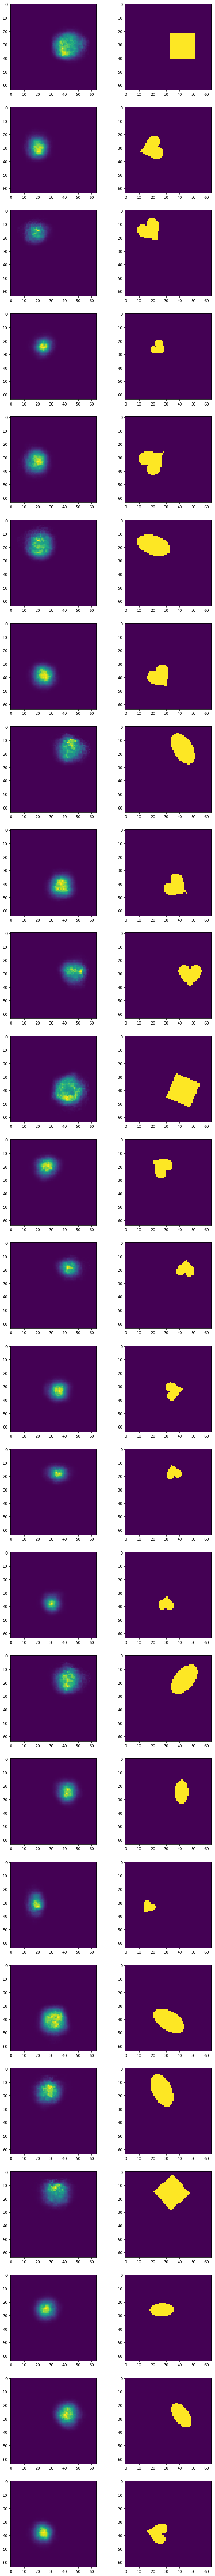

In [5]:
predictions = model.predict(imgs)
def do_plot(x_test, pred, npred):
    rows, cols = npred, 2
    f = plt.figure(figsize=(10, 125))
    for i in range(rows*cols):
        f.add_subplot(rows, cols, i+1)
        if i % 2 == 0:
            img = pred[int(i/2)][0, :, :]
        else:
            img = x_test[int(i/2)][0, :, :]
        plt.imshow(img)
    plt.show()
do_plot(imgs, predictions, len(predictions))

In [6]:
sliders = {'x'+str(x): widgets.FloatSlider(min=-250,max=250,step=.5, orientation='horizontal', 
                                           description='x'+str(x),
#                                            value=np.random.uniform(-10, 10)) 
                                           value=0., continuous_update=False)
           for x in range(1,ldim+1)}


def hook(**sliders):
    e = list(sliders.values())
    d = (model.decode(torch.tensor(e).to(torch.double).view(1,ldim)))[0][0, :, :]  # yikes
    plt.imshow(d.detach().numpy())
    
out = widgets.interactive_output(hook, sliders)

widgets.HBox([widgets.VBox([v for _, v in sliders.items()]), out])